# **Predict the Business License Status :**

**Multi-Class Classification Problem**

1.   **Aim :-** `Goal is to perform a Multi-Class Classification on the business license status of various user's.
2.   **TARGET VARIABLE:-** 'LICENSE STATUS'





In [4]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Importing the dataset
train_data = pd.read_csv("Dataset_ZS/train_file.csv")
test_data = pd.read_csv("Dataset_ZS/test_file.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sample_submission = pd.DataFrame({'ID': test_data.ID})
sample_submission.head()

In [210]:
train_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [211]:
train_data.shape

(85895, 32)

In [212]:
test_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [213]:
test_data.shape

(57239, 31)

In [214]:
train_data.ID.shape

(85895,)

## **Exploring Data**

In [14]:
# The data type of each column
train_data.dtypes

ID                                    object
LICENSE ID                             int64
ACCOUNT NUMBER                         int64
SITE NUMBER                            int64
LEGAL NAME                            object
DOING BUSINESS AS NAME                object
ADDRESS                               object
CITY                                  object
STATE                                 object
ZIP CODE                              object
WARD                                 float64
PRECINCT                             float64
WARD PRECINCT                         object
POLICE DISTRICT                      float64
LICENSE CODE                           int64
LICENSE DESCRIPTION                   object
LICENSE NUMBER                       float64
APPLICATION TYPE                      object
APPLICATION CREATED DATE              object
APPLICATION REQUIREMENTS COMPLETE     object
PAYMENT DATE                          object
CONDITIONAL APPROVAL                  object
LICENSE TE

In [15]:
# The number of missing values in each column.
train_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [16]:
train_data.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [17]:
test_data.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [18]:
test_data.nunique()

ID                                   57239
LICENSE ID                           57239
ACCOUNT NUMBER                       36724
SITE NUMBER                            297
LEGAL NAME                           36523
DOING BUSINESS AS NAME               39364
ADDRESS                              39637
CITY                                   331
STATE                                   43
ZIP CODE                               420
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2461
POLICE DISTRICT                         25
LICENSE CODE                           124
LICENSE DESCRIPTION                    124
LICENSE NUMBER                       49383
APPLICATION TYPE                         6
APPLICATION CREATED DATE              3684
APPLICATION REQUIREMENTS COMPLETE     3884
PAYMENT DATE                          4930
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               3737
LICENSE TER

In [19]:
# The target variable
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


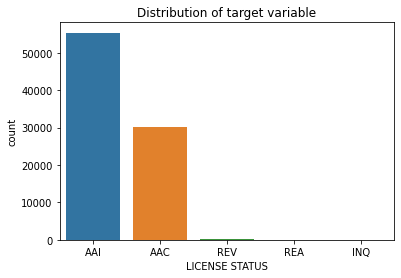

In [20]:
plt.title('Distribution of target variable')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()

In [21]:
# Percentage of missing values in each column
train_data.isnull().sum() * 100 / len(train_data)

ID                                    0.000000
LICENSE ID                            0.000000
ACCOUNT NUMBER                        0.000000
SITE NUMBER                           0.000000
LEGAL NAME                            0.000000
DOING BUSINESS AS NAME                0.001164
ADDRESS                               0.000000
CITY                                  0.000000
STATE                                 0.000000
ZIP CODE                              0.036091
WARD                                 57.862507
PRECINCT                             66.011991
WARD PRECINCT                        57.861342
POLICE DISTRICT                      62.881425
LICENSE CODE                          0.000000
LICENSE DESCRIPTION                   0.000000
LICENSE NUMBER                        0.001164
APPLICATION TYPE                      0.000000
APPLICATION CREATED DATE             75.277956
APPLICATION REQUIREMENTS COMPLETE     0.249141
PAYMENT DATE                          1.500669
CONDITIONAL A

## **Preparing Data**

**Reduce the dimensions:- Drop columns which will be of no use**

In [215]:
# 'ID':- All values are Unique.
# 'LICENSE ID':- All values are Unique.
# 'APPLICATION CREATED DATE':- 75% of the values in this column are NAN.
# 'SSA':- 88% of the values in this column are NAN. 

drop_col = [ 'ID','LICENSE ID','APPLICATION CREATED DATE','LOCATION','SSA','ADDRESS'] 
train_data = train_data.drop(drop_col, axis=1)
test_data = test_data.drop(drop_col, axis=1)

In [216]:
train_data.shape

(85895, 26)

**Create new column 'COMPANY TYPE' having multi-class CORP, PVT, INC, LLC,LTD using 'LEGAL NAME' and 'DOING BUSINESS AS NAME'**

In [217]:
train_data['COMPANY TYPE'] = 'PVT'
test_data['COMPANY TYPE'] = 'PVT'

In [220]:
train_data['COMPANY TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['COMPANY TYPE'])

In [219]:
test_data['COMPANY TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['COMPANY TYPE'])

In [221]:
train_data['COMPANY TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['COMPANY TYPE'])

In [222]:
test_data['COMPANY TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['COMPANY TYPE'])

In [223]:
train_data['COMPANY TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['COMPANY TYPE'])

In [224]:
test_data['COMPANY TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['COMPANY TYPE'])

In [226]:
train_data['COMPANY TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['COMPANY TYPE'])
train_data['COMPANY TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['COMPANY TYPE'])

In [227]:
test_data['COMPANY TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['COMPANY TYPE'])
test_data['COMPANY TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['COMPANY TYPE'])

In [228]:
train_data['COMPANY TYPE'].value_counts()

CORP    27759
PVT     27366
INC     24449
LLC      4705
LTD      1616
Name: COMPANY TYPE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


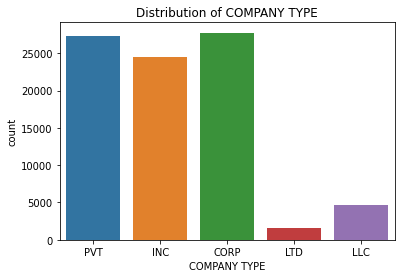

In [229]:
plt.title('Distribution of COMPANY TYPE')
sns.countplot(train_data['COMPANY TYPE'])
plt.show()

In [230]:
pd.crosstab(train_data['COMPANY TYPE'],train_data['LICENSE STATUS']).apply(lambda r:r/r.sum(),axis=1)

LICENSE STATUS,AAC,AAI,INQ,REA,REV
COMPANY TYPE,,,,,
CORP,0.257898,0.740409,0.000000,0.000036,0.001657
INC,0.360015,0.633686,0.000082,0.000082,0.006135
LLC,0.445909,0.549841,0.000000,0.000000,0.004251
LTD,0.420173,0.573639,0.000000,0.000000,0.006188
PVT,0.418841,0.578820,0.000000,0.000000,0.002339


In [231]:
# Remove 'T00:00:00' from each row contain date

date_list = [ 'LICENSE TERM START DATE','APPLICATION REQUIREMENTS COMPLETE', 'LICENSE APPROVED FOR ISSUANCE', 
             'LICENSE STATUS CHANGE DATE','PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE','DATE ISSUED']

for i in date_list:
  train_data[i] = pd.to_datetime(train_data[i])
  test_data[i] = pd.to_datetime(test_data[i])

In [232]:
def year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)

In [233]:
year('START YEAR', 'LICENSE TERM START DATE')
year('APPROVED YEAR', 'LICENSE APPROVED FOR ISSUANCE')
year('EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
year('PAYMENT YEAR', 'PAYMENT DATE')
month('PAYMENT MONTH', 'PAYMENT DATE')
year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
year('ISSUED YEAR', 'DATE ISSUED')
year('STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

**Replace NaN values**

In [234]:
train_data.isna().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
WARD PRECINCT                             49700
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                1
APPLICATION TYPE                              0
APPLICATION REQUIREMENTS COMPLETE           214
PAYMENT DATE                               1289
CONDITIONAL APPROVAL                          0
LICENSE TERM START DATE                     228
LICENSE TERM EXPIRATION DATE                 18
LICENSE APPROVED FOR ISSUANCE           

In [235]:
#impute missing values by rounded value of mean
def year_mean(imp_mean):
  for i in imp_mean:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))
# Function to impute missing values by mean
def impute_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(train_data[i].mean())
        test_data[i] = test_data[i].fillna(train_data[i].mean())
# Function to impute with None
def impute_none(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('None')
        test_data[i] = test_data[i].fillna('None')
# Function to impute with 0
def impute_nil(imp_nil_list):
    for i in imp_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)

In [236]:
year_mean_list = ['ISSUED YEAR','EXPIRATION YEAR', 'START YEAR', 'PAYMENT YEAR', 'APPROVED YEAR',
                 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'STATUS CHANGE YEAR','PAYMENT MONTH']
imp_mean_list = ['LATITUDE', 'LONGITUDE']
imp_none_list = ['ZIP CODE']
imp_nil_list = ['WARD', 'PRECINCT', 'POLICE DISTRICT', 'WARD PRECINCT', 'LICENSE NUMBER','CONDITIONAL APPROVAL']

impute_nil(imp_nil_list)
impute_none(imp_none_list)
year_mean(year_mean_list)
impute_mean(imp_mean_list)

**Dropping columns which will be of no use.**

In [237]:
col_list = ['DOING BUSINESS AS NAME', 'LEGAL NAME','PAYMENT DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'LICENSE TERM EXPIRATION DATE', 'DATE ISSUED', 
           'LICENSE TERM START DATE','LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']

In [238]:
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [239]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,COMPANY TYPE,START YEAR,APPROVED YEAR,EXPIRATION YEAR,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,ISSUED YEAR,STATUS CHANGE YEAR
0,32811,1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,N,41.843613,-87.714618,AAI,PVT,2002.0,2002.0,2003.0,2002.0,8.0,2002.0,2006,2009.0
1,262311,29,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,N,41.961132,-87.699626,AAC,INC,2005.0,2006.0,2006.0,2005.0,11.0,2005.0,2006,2006.0
2,345008,1,HIGHLAND,IL,60035,0.0,0.0,0,0.0,1011,Home Repair,1980233.0,ISSUE,N,41.880952,-87.681165,AAI,INC,2009.0,2009.0,2011.0,2009.0,7.0,2009.0,2009,2009.0
3,273121,1,LEMONT,IL,60439,0.0,0.0,0,0.0,1010,Limited Business License,1476582.0,ISSUE,N,41.880952,-87.681165,AAI,CORP,2004.0,2004.0,2005.0,2004.0,2.0,2004.0,2004,2009.0
4,213785,1,WAUKEGAN,IL,60087,0.0,0.0,0,0.0,1010,Limited Business License,1141408.0,RENEW,N,41.880952,-87.681165,AAI,PVT,2008.0,2008.0,2010.0,2008.0,6.0,2008.0,2008,2009.0


In [240]:
test_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,COMPANY TYPE,START YEAR,APPROVED YEAR,EXPIRATION YEAR,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,ISSUED YEAR,STATUS CHANGE YEAR
0,280120,1,CHICAGO,IL,60610,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,N,41.890047,-87.637467,LLC,2012.0,2012.0,2014.0,2012.0,1.0,2011.0,2012,2012.0
1,65043,1,CHICAGO,IL,60636,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,N,41.786485,-87.676665,INC,2011.0,2012.0,2013.0,2012.0,11.0,2011.0,2012,2012.0
2,281270,1,CHICAGO,IL,60605,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,N,41.868269,-87.625695,CORP,2004.0,2004.0,2005.0,2004.0,12.0,2004.0,2004,2009.0
3,335243,1,CHICAGO,IL,60827,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,N,41.655762,-87.608686,PVT,2010.0,2007.0,2012.0,2010.0,11.0,2010.0,2010,2012.0
4,283018,3,CHICAGO,IL,60632,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,N,41.816969,-87.699785,CORP,2007.0,2007.0,2009.0,2007.0,8.0,2007.0,2007,2008.0


In [241]:
train_data.isna().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
STATE                                     0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
WARD PRECINCT                             0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
LATITUDE                                  0
LONGITUDE                                 0
LICENSE STATUS                            0
COMPANY TYPE                              0
START YEAR                                0
APPROVED YEAR                             0
EXPIRATION YEAR                           0
PAYMENT YEAR                              0
PAYMENT MONTH                   

In [242]:
test_data.isna().sum()

ACCOUNT NUMBER                            0
SITE NUMBER                               0
CITY                                      0
STATE                                     0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
WARD PRECINCT                             0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
LATITUDE                                  0
LONGITUDE                                 0
COMPANY TYPE                              0
START YEAR                                0
APPROVED YEAR                             0
EXPIRATION YEAR                           0
PAYMENT YEAR                              0
PAYMENT MONTH                             0
APPLICATION REQUIREMENTS COMPLET

In [243]:
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
train_data['LICENSE DESCRIPTION'] = train_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')

In [244]:
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
test_data['LICENSE DESCRIPTION'] = test_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')

In [245]:
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

✅**We will remove the class REV, REA, INQ since we have very few records of those as compare to the AAI and AAC in the training set.We will be going forward with Majority of the data from Dataset.We have to take this step beacuse of the biasness between the classes.**

❌**We can also Consider the Opposition of undersample the data of AAC and AAI to 350-274. But it will result into lossing 98.9% of the data.**

In [246]:
def class_drop(class_list):
  for x in class_list:
    index_names = train_data[ train_data['LICENSE STATUS'] == x  ].index
    train_data.drop(index_names, inplace = True)

In [247]:
class_drop(['REV','REA','INQ'])

In [248]:
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)


In [249]:
train_data['LICENSE STATUS'].value_counts()

0    55400
1    30200
Name: LICENSE STATUS, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


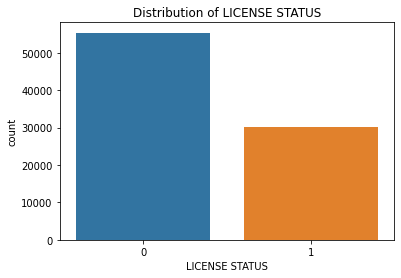

In [250]:
plt.title('Distribution of LICENSE STATUS')
sns.countplot(train_data['LICENSE STATUS'])
plt.show()

In [251]:
imp_col = ['PRECINCT','STATUS CHANGE YEAR','WARD','LICENSE DESCRIPTION','PAYMENT MONTH','LICENSE NUMBER',
 'LICENSE CODE','LATITUDE','LONGITUDE','CITY','POLICE DISTRICT','ACCOUNT NUMBER','WARD PRECINCT','ZIP CODE',
 'SITE NUMBER','ISSUED YEAR','APPLICATION TYPE','COMPANY TYPE']
y = train_data.columns.values.tolist()
x = [i for i in y if i not in imp_col]

In [252]:
x

['STATE',
 'CONDITIONAL APPROVAL',
 'LICENSE STATUS',
 'START YEAR',
 'APPROVED YEAR',
 'EXPIRATION YEAR',
 'PAYMENT YEAR',
 'APPLICATION REQUIREMENTS COMPLETE YEAR']

In [253]:
from sklearn.preprocessing import LabelEncoder
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [254]:
train_data = create_dummies(train_data)

CITY encoded
STATE encoded
ZIP CODE encoded
argument must be a string or number
WARD PRECINCT encoded
argument must be a string or number
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
COMPANY TYPE encoded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [255]:
test_data = create_dummies(test_data)

CITY encoded
STATE encoded
ZIP CODE encoded
argument must be a string or number
WARD PRECINCT encoded
argument must be a string or number
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
COMPANY TYPE encoded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [256]:
# 'ZIP CODE' 'WARD PRECINCT' are object 
encoder = LabelEncoder()
train_data["WARD PRECINCT"] = encoder.fit_transform(train_data["WARD PRECINCT"].astype(str))
test_data["WARD PRECINCT"] = encoder.fit_transform(test_data["WARD PRECINCT"].astype(str))

In [257]:
encoder = LabelEncoder()
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))

In [258]:
train_data.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,COMPANY TYPE,START YEAR,APPROVED YEAR,EXPIRATION YEAR,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,ISSUED YEAR,STATUS CHANGE YEAR
0,32811,1,193,16,1559,22.0,28.0,689,10.0,1010,41,35342.0,4,0,41.843613,-87.714618,0,4,2002.0,2002.0,2003.0,2002.0,8.0,2002.0,2006,2009.0
1,262311,29,193,16,1548,33.0,23.0,1229,17.0,1315,46,1358463.0,4,0,41.961132,-87.699626,1,1,2005.0,2006.0,2006.0,2005.0,11.0,2005.0,2006,2006.0
2,345008,1,466,16,1025,0.0,0.0,1,0.0,1011,30,1980233.0,3,0,41.880952,-87.681165,0,1,2009.0,2009.0,2011.0,2009.0,7.0,2009.0,2009,2009.0
3,273121,1,585,16,1329,0.0,0.0,1,0.0,1010,41,1476582.0,3,0,41.880952,-87.681165,0,0,2004.0,2004.0,2005.0,2004.0,2.0,2004.0,2004,2009.0
4,213785,1,1145,16,1095,0.0,0.0,1,0.0,1010,41,1141408.0,4,0,41.880952,-87.681165,0,4,2008.0,2008.0,2010.0,2008.0,6.0,2008.0,2008,2009.0


# **Check pairwise correlation of all columns**

In [259]:
new_df = train_data

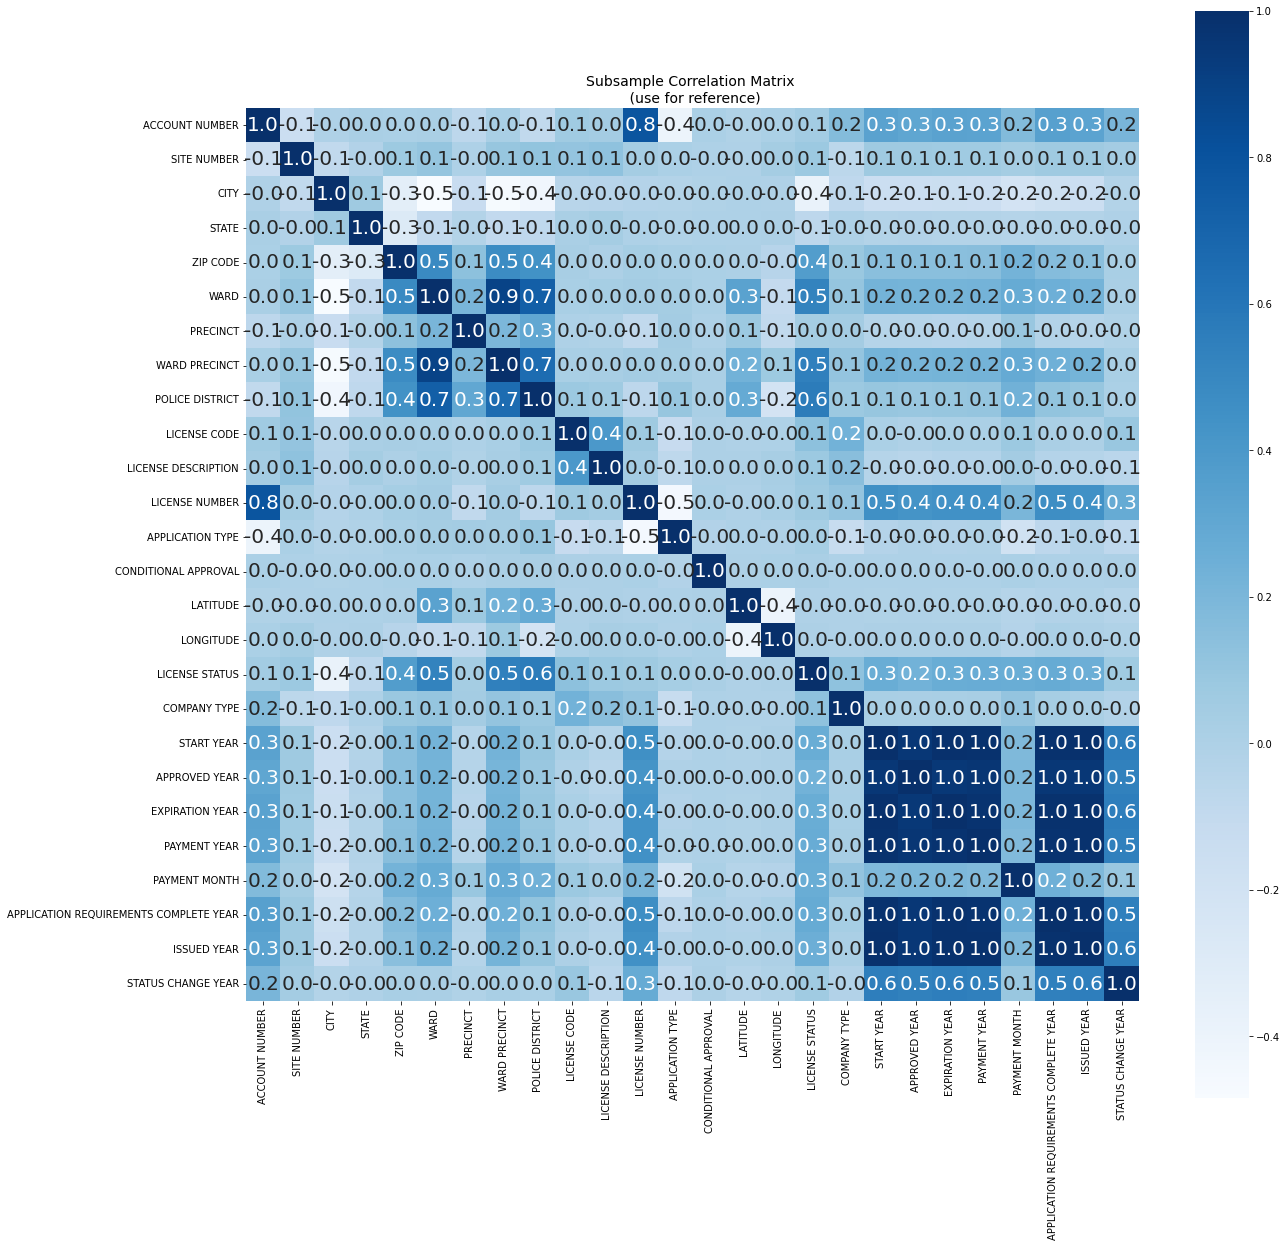

In [77]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Blues')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

**Since all the years are highly correlated, we will consider the one that has the least missing values**

In [260]:
 col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPROVED YEAR']
new_df = new_df.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

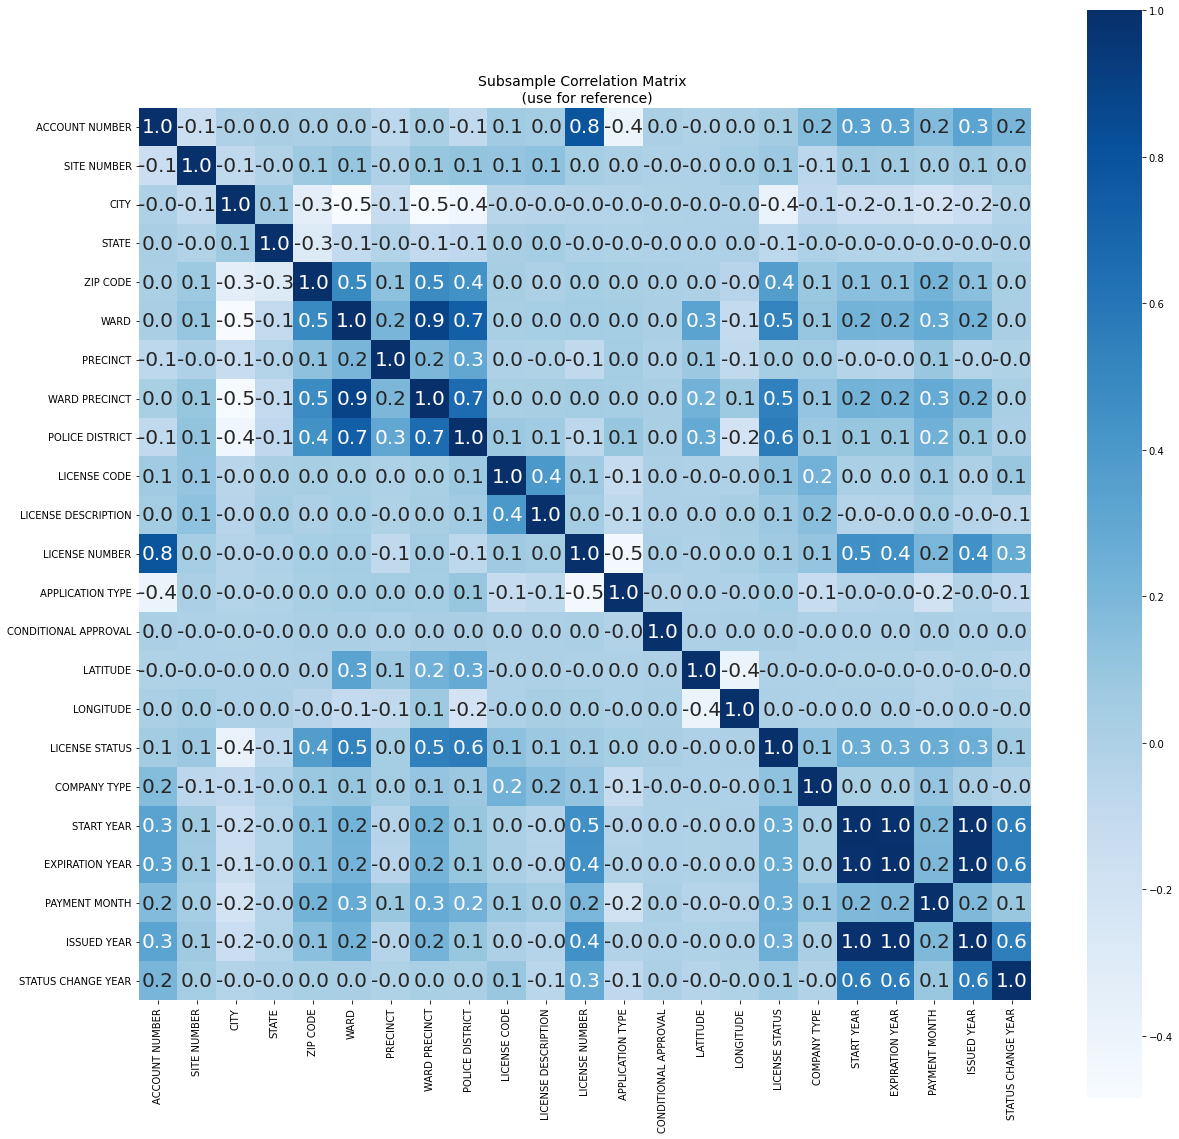

In [79]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Blues')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [261]:
col_list = ['START YEAR','EXPIRATION YEAR']
new_df = new_df.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

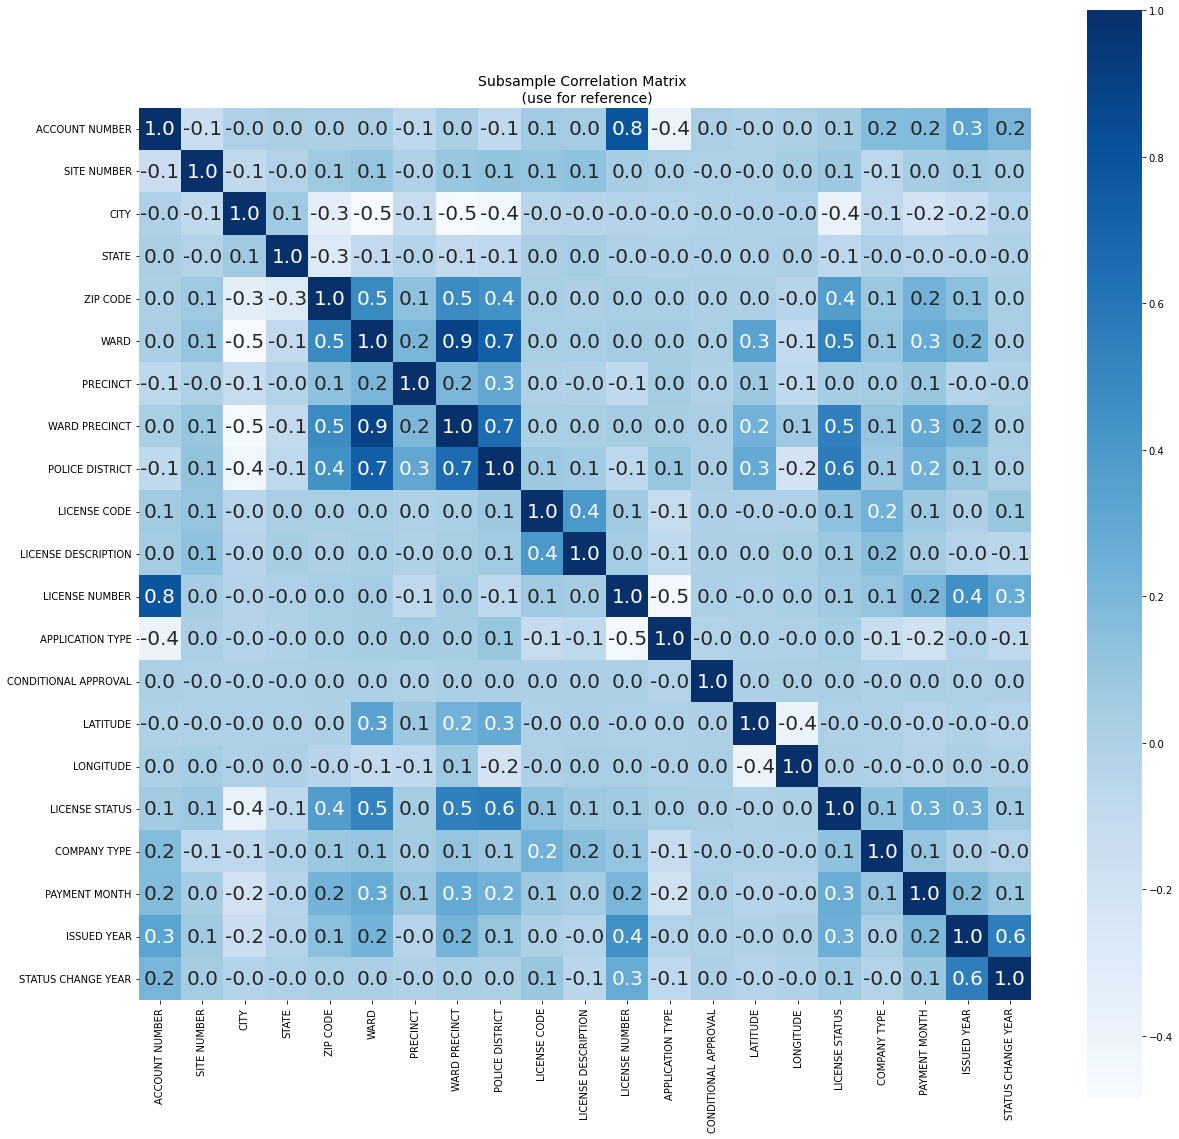

In [81]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Blues')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# **Splitting data into test and train**

In [262]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop(['LICENSE STATUS'], axis=1)
y = new_df['LICENSE STATUS']

In [263]:
new_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,COMPANY TYPE,PAYMENT MONTH,ISSUED YEAR,STATUS CHANGE YEAR
0,32811,1,193,16,1559,22.0,28.0,689,10.0,1010,41,35342.0,4,0,41.843613,-87.714618,0,4,8.0,2006,2009.0
1,262311,29,193,16,1548,33.0,23.0,1229,17.0,1315,46,1358463.0,4,0,41.961132,-87.699626,1,1,11.0,2006,2006.0
2,345008,1,466,16,1025,0.0,0.0,1,0.0,1011,30,1980233.0,3,0,41.880952,-87.681165,0,1,7.0,2009,2009.0
3,273121,1,585,16,1329,0.0,0.0,1,0.0,1010,41,1476582.0,3,0,41.880952,-87.681165,0,0,2.0,2004,2009.0
4,213785,1,1145,16,1095,0.0,0.0,1,0.0,1010,41,1141408.0,4,0,41.880952,-87.681165,0,4,6.0,2008,2009.0


In [ ]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

✅**We will be using "StratifiedShuffleSplit" because of the class distribution in your target variable is AAI 64.48% AAC 35.15%. Difference between both is 29.34% which is very high. StratifiedShuffleSplit will balance distributation in train and test.**

In [264]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
sss.get_n_splits(new_df)

5

In [265]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [38699 36360 44302 ... 21288 78991 45789] TEST: [45442 28297 83122 ... 17744 71740   631]
TRAIN: [81805 83505 25310 ... 44253 58283 68475] TEST: [57282  6444  3804 ... 25631 17392 54540]
TRAIN: [12193 63472  7022 ... 15994 36785 66517] TEST: [34638   634 13887 ... 11425 25300 16304]
TRAIN: [32152 75655 54683 ... 28195 31330 46663] TEST: [15403  7949 23409 ... 32414 70097 63770]
TRAIN: [54317 16580  7227 ... 35573  7288 40082] TEST: [29110  3918 52344 ... 12142 38596 25250]


In [266]:
# A function to create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

In [267]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [268]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from datetime import datetime
from sklearn import metrics

**Logistic Regression Total Accuracy : 78.88%**

In [269]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils


lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [270]:
y_pred = logreg.predict(X_test)
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )
print(round(f1_score(y_test, y_pred, average='macro')*100,2))

Total Accuracy :  78.88
76.34


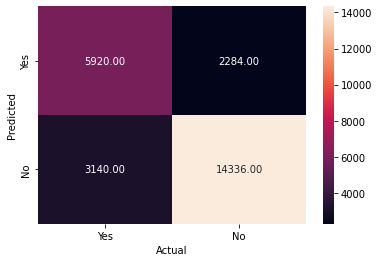

In [271]:
draw_cm(y_test, y_pred)

**Decision Tree Total Accuracy :  98.93%**

In [199]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )
print(round(f1_score(y_test, y_pred, average='macro')*100,2))

Total Accuracy :  98.93
98.82


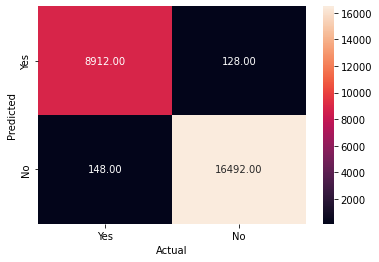

In [200]:
draw_cm(y_test, y_pred)

**Gaussian Naive Bayes Total Accuracy :  82.69%**

In [175]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train.astype(int))

GaussianNB(priors=None, var_smoothing=1e-09)

In [176]:
# Prediction on test set
y_pred = model.predict(X_test)
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )
print(round(f1_score(y_test, y_pred, average='macro')*100,2))

Total Accuracy :  82.69
81.75


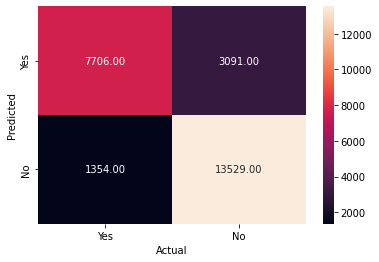

In [103]:
draw_cm(y_test, y_pred)

**K - Nearest Neighbors Total Accuracy :  81.47%**

In [164]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN(n_neighbors=3)
model.fit(X_train, y_train)
preds = model.predict(X_test)

acc_kn = round( metrics.accuracy_score(y_test, preds) * 100, 2 )
print( 'Total Accuracy : ', acc_kn)
print(round(f1_score(y_test, preds, average='macro')*100,2))

Total Accuracy :  81.47
79.15


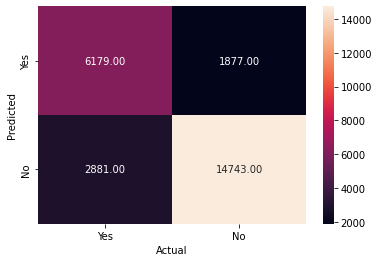

In [111]:
draw_cm(y_test, preds)

**XGboost Total Accuracy :  98.89%**

In [278]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, 
                      silent=False, objective='binary:logistic', nthread=-1, 
                      gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
                      colsample_bytree=1, colsample_bylevel=1, reg_alpha=0,
                      reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )
print('F1 Score : ',round(f1_score(y_test, y_pred, average='macro')*100,2))

Total Accuracy :  98.89
F1 Score :  98.78


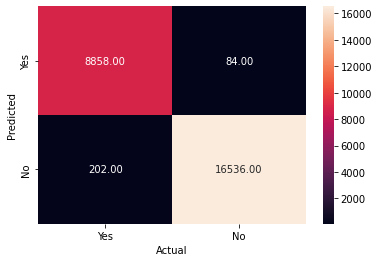

In [279]:
draw_cm(y_test, y_pred)

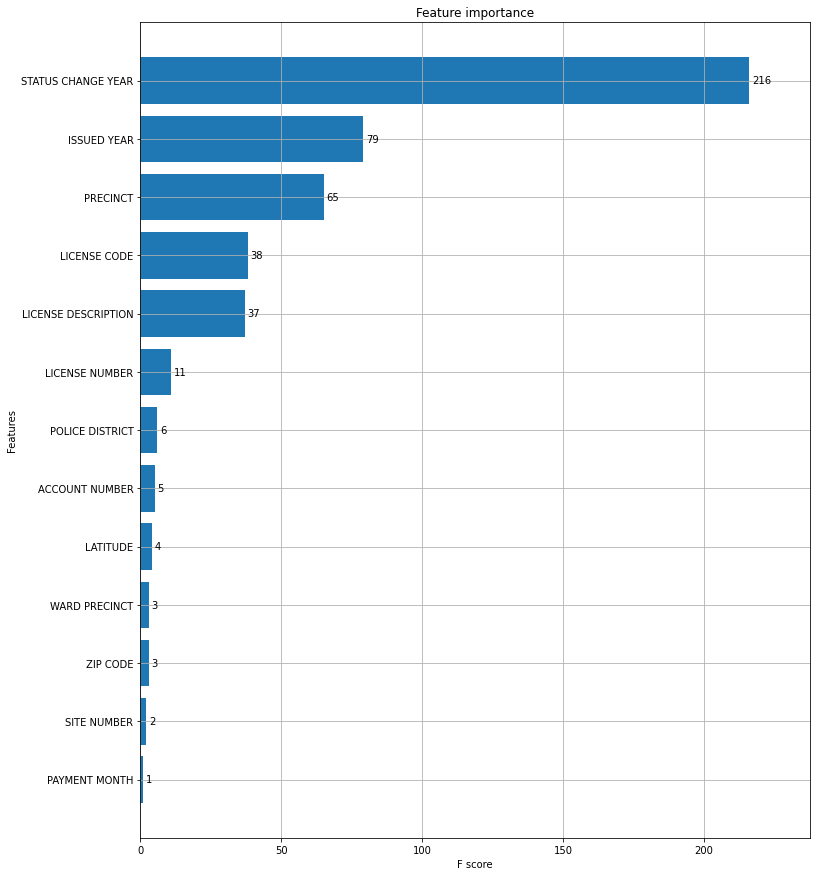

In [280]:
# Feature Engineering
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12,15))
plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

# **Predictions on the Test Dataset.**

In [281]:
# Predicting on the test dataset
my_pred = model.predict(test_data)

In [282]:
sample_submission['LICENSE STATUS'] = my_pred

In [284]:
sample_submission.shape

(57239, 2)

In [287]:
sample_submission['LICENSE STATUS'] = sample_submission['LICENSE STATUS'].replace(0, 'AAI')
sample_submission['LICENSE STATUS'] = sample_submission['LICENSE STATUS'].replace(1, 'AAC')

In [288]:
sample_submission.head()

,ID,LICENSE STATUS
0,1516615-20120216,AAC
1,69813-20110616,AAC
2,1519227-20041116,AAI
3,1922025-20100816,AAC
4,1675683-20070816,AAC


In [289]:
sample_submission.to_csv('sample_submission.csv', index=False)
print('Saved file to disk.')

Saved file to disk.


# **Miscellaneous**

**Feature Selection**

In [109]:
from sklearn.feature_selection import RFE
name_list = new_df.columns.values.tolist()
target = ['LICENSE STATUS']
re_col = [i for i in name_list if i not in target]
model = LogisticRegression()
rfe = RFE(model, 15)
rfe = rfe.fit(new_df[re_col],new_df[target])
print(rfe.support_)
print(rfe.ranking_)
print(re_col)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[False  True False  True False  True  True  True  True  True  True False
  True False  True  True  True  True  True  True]
[4 1 3 1 2 1 1 1 1 1 1 5 1 6 1 1 1 1 1 1]
['ACCOUNT NUMBER', 'SITE NUMBER', 'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE', 'CONDITIONAL APPROVAL', 'LATITUDE', 'LONGITUDE', 'COMPANY TYPE', 'PAYMENT MONTH', 'ISSUED YEAR', 'STATUS CHANGE YEAR']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [182]:
# FS
fs_col = ['SITE NUMBER', 'STATE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 
          'CONDITIONAL APPROVAL', 'LONGITUDE', 'COMPANY TYPE', 'PAYMENT MONTH', 'ISSUED YEAR', 'STATUS CHANGE YEAR']
X_ = new_df.drop(['ACCOUNT NUMBER','CITY','ZIP CODE','APPLICATION TYPE','LATITUDE','LICENSE STATUS'], axis=1)
y_ = new_df['LICENSE STATUS']

In [184]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
sss.get_n_splits(X_)
for train_index, test_index in sss.split(X_, y_):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_, X_test_ = X_.iloc[train_index], X_.iloc[test_index]
    y_train_, y_test_ = y_.iloc[train_index], y_.iloc[test_index]

TRAIN: [38699 36360 44302 ... 21288 78991 45789] TEST: [45442 28297 83122 ... 17744 71740   631]
TRAIN: [81805 83505 25310 ... 44253 58283 68475] TEST: [57282  6444  3804 ... 25631 17392 54540]
TRAIN: [12193 63472  7022 ... 15994 36785 66517] TEST: [34638   634 13887 ... 11425 25300 16304]
TRAIN: [32152 75655 54683 ... 28195 31330 46663] TEST: [15403  7949 23409 ... 32414 70097 63770]
TRAIN: [54317 16580  7227 ... 35573  7288 40082] TEST: [29110  3918 52344 ... 12142 38596 25250]


In [185]:
X_train_.columns

Index(['SITE NUMBER', 'STATE', 'WARD', 'PRECINCT', 'WARD PRECINCT',
       'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION',
       'LICENSE NUMBER', 'CONDITIONAL APPROVAL', 'LONGITUDE', 'COMPANY TYPE',
       'PAYMENT MONTH', 'ISSUED YEAR', 'STATUS CHANGE YEAR'],
      dtype='object')

In [186]:
# Logistic Regression

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import f1_score


lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train_, y_train_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
y_pred = logreg.predict(X_test_)
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test_, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg)
print(round(f1_score(y_test_, y_pred, average='macro')*100,2))

Total Accuracy :  77.22
73.54


In [191]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train_,y_train_)# Prediction on test set
y_pred = model.predict(X_test_)# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test_, y_pred) * 100, 2)
print( 'Total Accuracy : ', acc_nb)
print(round(f1_score(y_test_, y_pred, average='macro')*100,2))

Total Accuracy :  79.28
76.78


In [192]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, 
                      silent=False, objective='binary:logistic', nthread=-1, 
                      gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
                      colsample_bytree=1, colsample_bylevel=1, reg_alpha=0,
                      reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0)
model.fit(X_train_, y_train_)

y_pred = model.predict(X_test_)
acc_logreg = round( metrics.accuracy_score(y_test_, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )
print('F1 Score : ',round(f1_score(y_test, y_pred, average='macro')*100,2))

Total Accuracy :  98.87
F1 Score :  98.76


In [193]:
model.get_booster().get_score(importance_type="gain")

{'ISSUED YEAR': 82.23386350181013,
 'LICENSE CODE': 28.255690909522727,
 'LICENSE DESCRIPTION': 26.503867518500005,
 'LICENSE NUMBER': 14.713180718875,
 'PAYMENT MONTH': 7.968991391428572,
 'POLICE DISTRICT': 11.002781146250001,
 'PRECINCT': 3468.326851293127,
 'SITE NUMBER': 9.9817028,
 'STATUS CHANGE YEAR': 745.3936230792206,
 'WARD': 8.44902134,
 'WARD PRECINCT': 2.068368274}

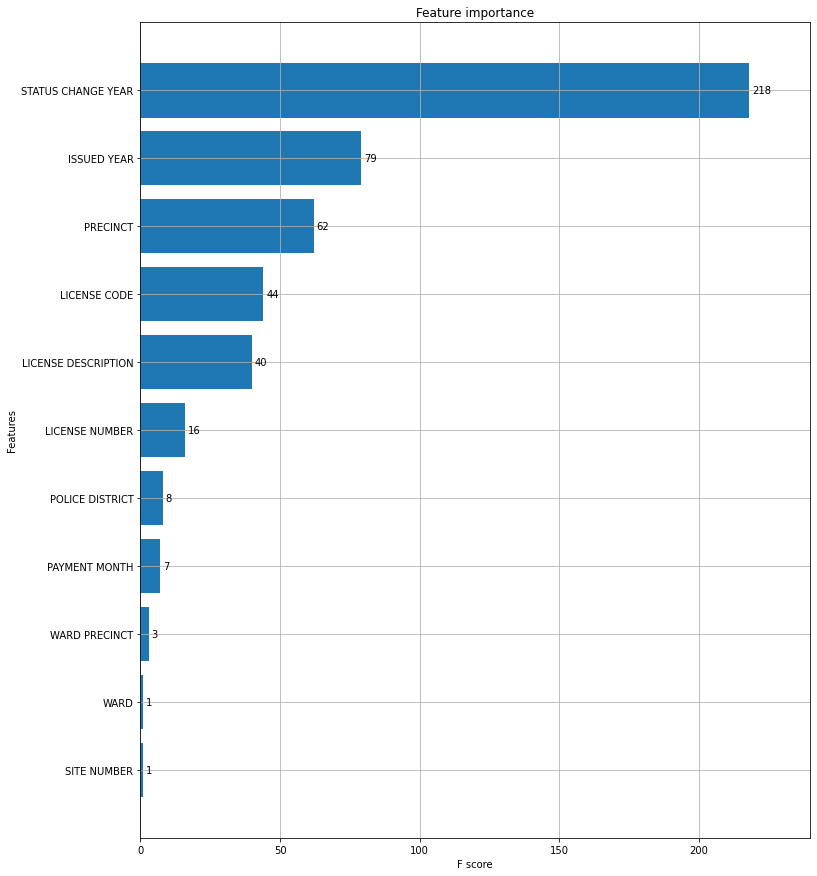

In [194]:
fig, ax = plt.subplots(figsize=(12,15))
plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()